In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import sklearn 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import plot_tree
from sklearn import metrics
from kmodes.kmodes import KModes

pd.set_option('display.max_columns', None)

In this project I will be looking at Different classification methods and seeeing if they can correctly predicit the type (if any) of obesity that a person has, and try to find the best model.


##### Data Soucre: https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster

In [35]:
df = pd.read_csv('ObesityDataSet.csv')
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [36]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


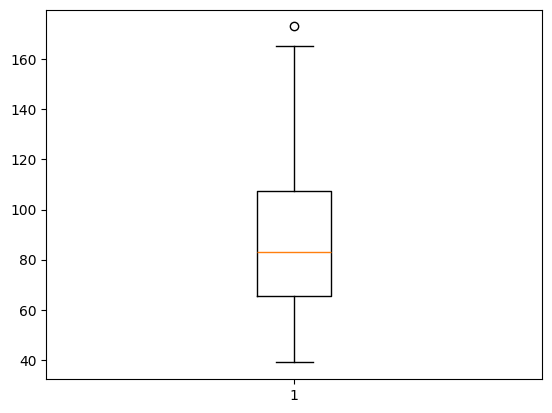

In [37]:
plt.boxplot(df['Weight'])
plt.show()

In [38]:
df[df['Weight'] ==173]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
344,Male,18.0,1.87,173.0,yes,yes,3.0,3.0,Frequently,no,2.0,no,2.0,1.0,Sometimes,Public_Transportation,Obesity_Type_III


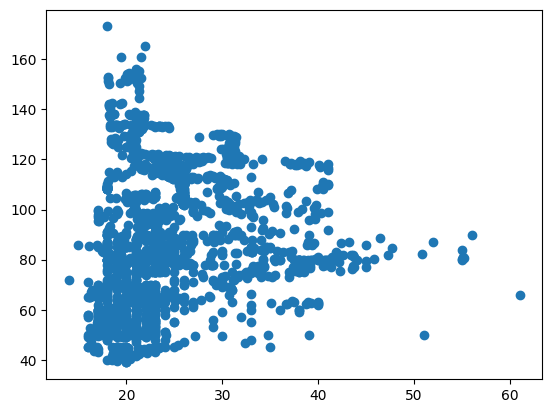

In [39]:
plt.scatter(df['Age'], df['Weight'])

In [40]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

# Data Cleaning

In [41]:
df['Gender'].value_counts()

Gender
Male      1068
Female    1043
Name: count, dtype: int64

In [42]:
df.rename(columns = {
                    'FAVC' : 'Frequent consumption of high caloric food',
                    'FCVC' : 'Frequency of consumption of vegetables',
                    'NCP' : 'Number of main meals',
                    'CAEC' : 'Consumption of food between meals',
                    'SMOKE' : 'Smoker',
                    'CH2O' : 'Consumption of water daily',
                    'SCC' : 'Calories consumption monitoring',
                    'FAF' : 'Physical activity frequency',
                    'TUE' : 'Time using technology devices',
                    'CALC' : 'Consumption of alcohol',
                    'MTRANS' : 'Transportation used',
                    'NObeyesdad' : 'Obesity level deducted'
                    },
                    inplace=True)

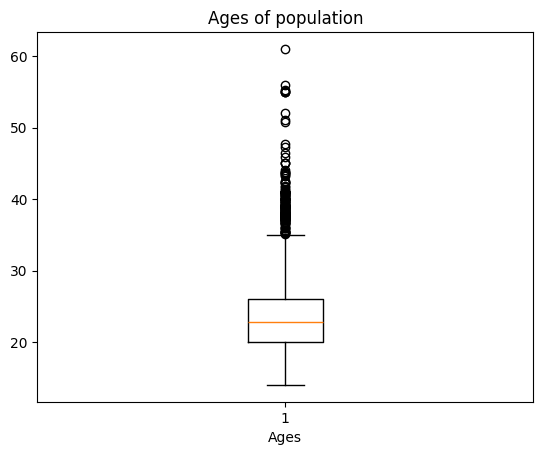

In [43]:
plt.boxplot(df['Age'])
plt.xlabel('Ages')
plt.title('Ages of population')
plt.show()

In [44]:
df['Obesity level deducted'].value_counts()

Obesity level deducted
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

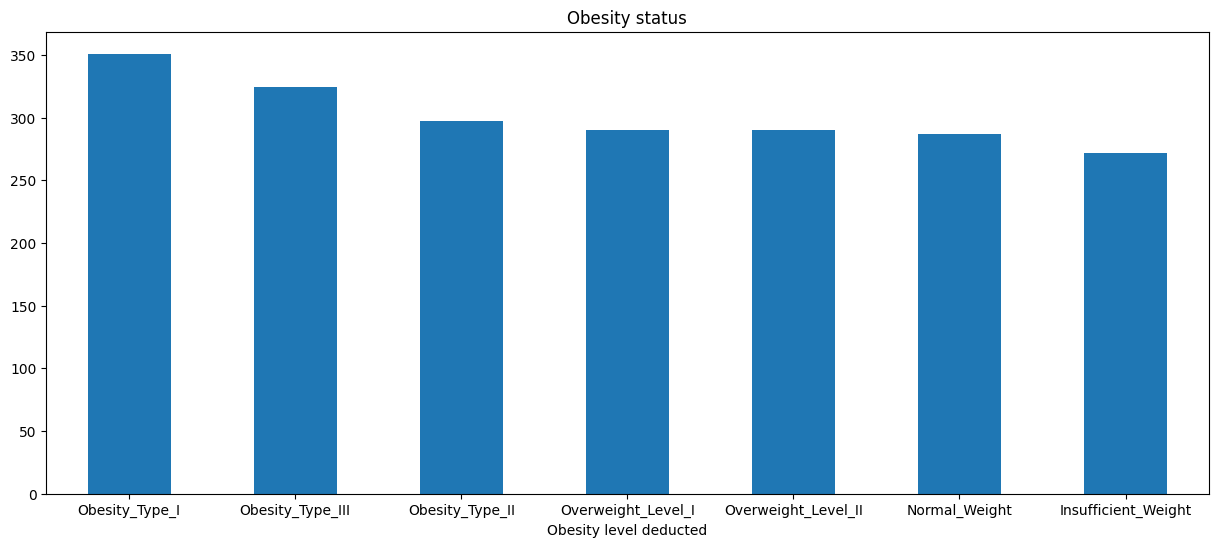

In [45]:
plt.figure(figsize=(15,6))
df['Obesity level deducted'].value_counts().plot(kind='bar')
#plt.figure(figsize=(10,8))
plt.title('Obesity status')

plt.xticks(rotation= 360)
plt.show()

An interesting observation that we can already see is that majority of the population is young with an average age of just 24 and an upper quartile of 26. Developing obesity at this age is not common and indicates to us that there may be external factors affecting this outcome. To be specific only 14 % fall under normal weight, with 27% overweight, and 46% obese. We will dive into these and try to see if we can find any correlations.

In [46]:
df.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoker,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity level deducted
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [47]:
df['Calories consumption monitoring'].value_counts()

Calories consumption monitoring
no     2015
yes      96
Name: count, dtype: int64

#### Binary Categorical Features:
Features like "family_history_with_overweight," "FAVC," "SMOKE," and "SCC" are binary, meaning they have two possible values (e.g., yes/no or true/false).

#### Multi-Class Categorical Features:
Features like "Gender," "CAEC," and "MTRANS" have more than two possible values, making them multi-class categorical features.

In [48]:
dropped_columns = df[['Height','Obesity level deducted']] 
df.drop(columns=dropped_columns, inplace=True)

# Binary Categorical Features (Label Encoding)
binary_features = [
    "family_history_with_overweight",
    "Frequent consumption of high caloric food",
    "Smoker",
    "Calories consumption monitoring",
    "Gender"
]
label_encoder = LabelEncoder()
df[binary_features] = df[binary_features].apply(label_encoder.fit_transform)

# Multi-Class Categorical Features (One-Hot Encoding)
multi_class_features = [
    "Consumption of food between meals",
    "Consumption of alcohol",
    "Transportation used",
]
df_encoded = pd.get_dummies(df, columns=multi_class_features).astype(int)

df_final = pd.concat([df_encoded, dropped_columns], axis=1)

df_final

,Gender,Age,Weight,family_history_with_overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Smoker,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of food between meals_Always,Consumption of food between meals_Frequently,Consumption of food between meals_Sometimes,Consumption of food between meals_no,Consumption of alcohol_Always,Consumption of alcohol_Frequently,Consumption of alcohol_Sometimes,Consumption of alcohol_no,Transportation used_Automobile,Transportation used_Bike,Transportation used_Motorbike,Transportation used_Public_Transportation,Transportation used_Walking,Height,Obesity level deducted
0,0,21,64,1,0,2,3,0,2,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1.620000,Normal_Weight
1,0,21,56,1,0,3,3,1,3,1,3,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1.520000,Normal_Weight
2,1,23,77,1,0,2,3,0,2,0,2,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1.800000,Normal_Weight
3,1,27,87,0,0,3,3,0,2,0,2,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1.800000,Overweight_Level_I
4,1,22,89,0,0,2,1,0,2,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1.780000,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20,131,1,1,3,3,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1.710730,Obesity_Type_III
2107,0,21,133,1,1,3,3,0,2,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1.748584,Obesity_Type_III
2108,0,22,133,1,1,3,3,0,2,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1.752206,Obesity_Type_III
2109,0,24,133,1,1,3,3,0,2,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1.739450,Obesity_Type_III


In [49]:
df_final

,Gender,Age,Weight,family_history_with_overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Smoker,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of food between meals_Always,Consumption of food between meals_Frequently,Consumption of food between meals_Sometimes,Consumption of food between meals_no,Consumption of alcohol_Always,Consumption of alcohol_Frequently,Consumption of alcohol_Sometimes,Consumption of alcohol_no,Transportation used_Automobile,Transportation used_Bike,Transportation used_Motorbike,Transportation used_Public_Transportation,Transportation used_Walking,Height,Obesity level deducted
0,0,21,64,1,0,2,3,0,2,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1.620000,Normal_Weight
1,0,21,56,1,0,3,3,1,3,1,3,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1.520000,Normal_Weight
2,1,23,77,1,0,2,3,0,2,0,2,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1.800000,Normal_Weight
3,1,27,87,0,0,3,3,0,2,0,2,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1.800000,Overweight_Level_I
4,1,22,89,0,0,2,1,0,2,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1.780000,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20,131,1,1,3,3,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1.710730,Obesity_Type_III
2107,0,21,133,1,1,3,3,0,2,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1.748584,Obesity_Type_III
2108,0,22,133,1,1,3,3,0,2,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1.752206,Obesity_Type_III
2109,0,24,133,1,1,3,3,0,2,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1.739450,Obesity_Type_III


In [50]:
df_final['Obesity level deducted'].value_counts()

Obesity level deducted
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

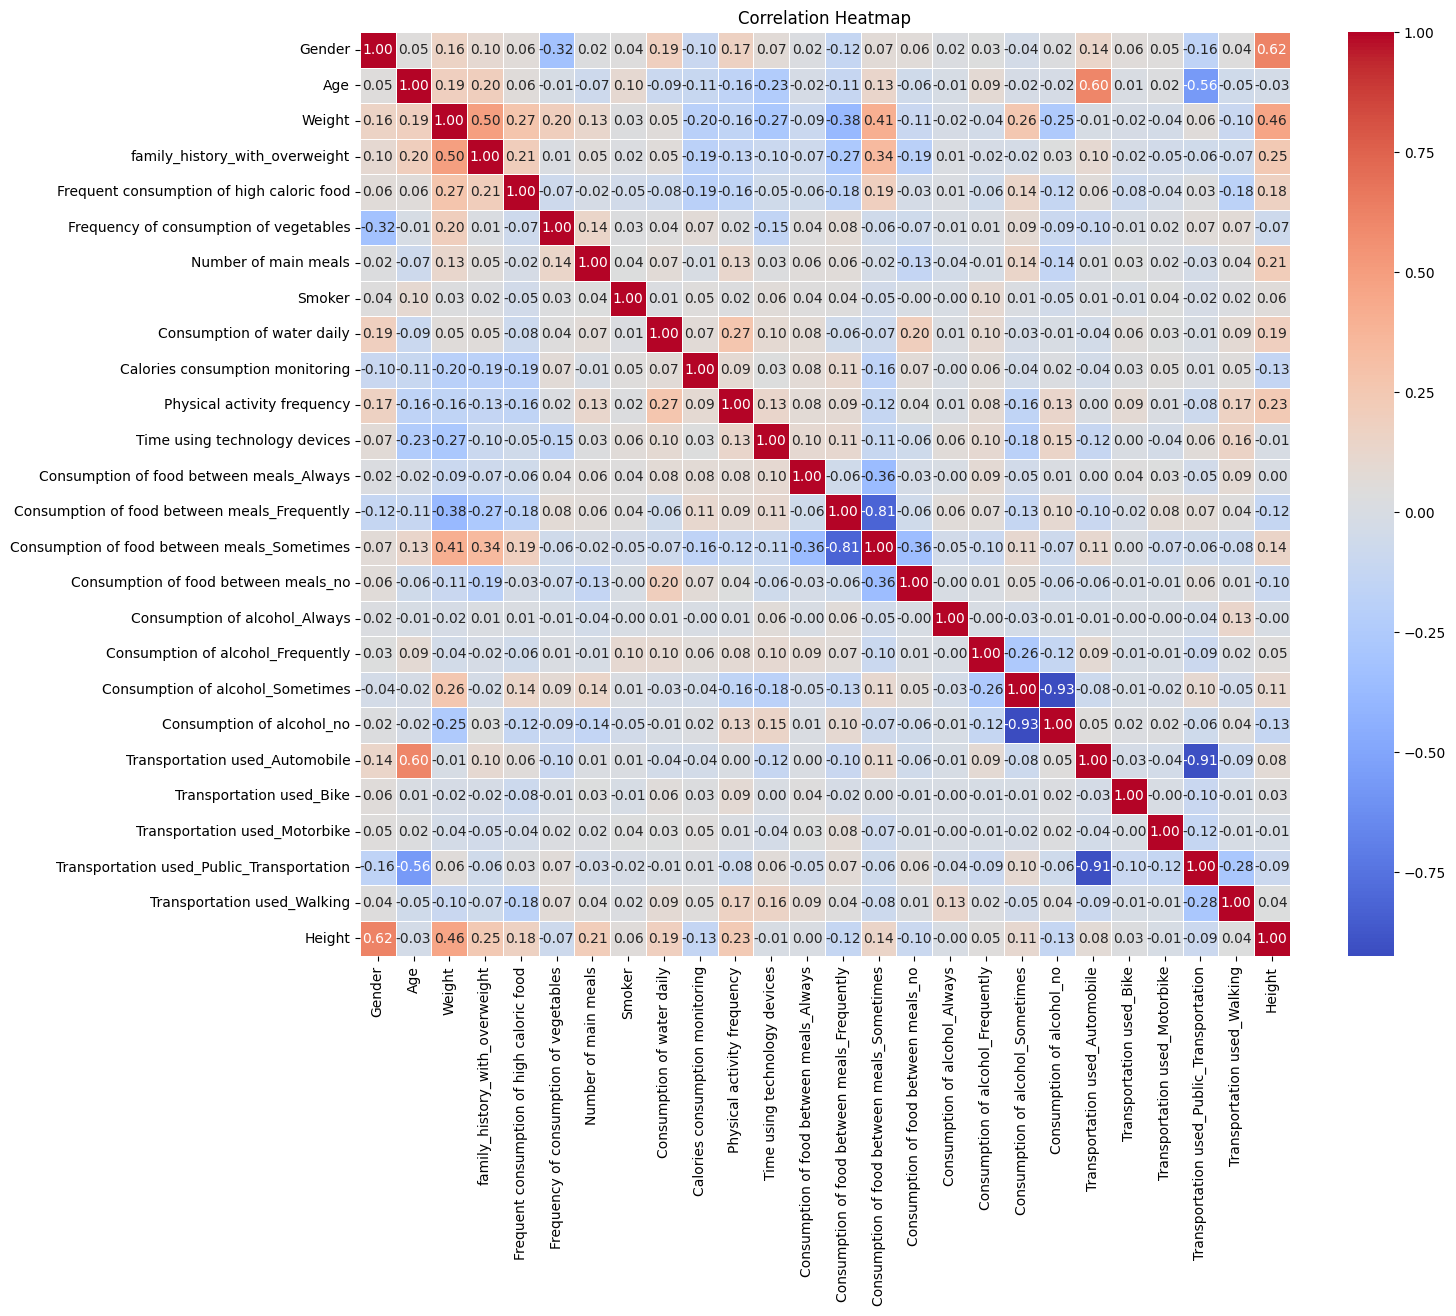

In [51]:
correlation_matrix =df_final.drop(columns = 'Obesity level deducted').corr()

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [52]:
# # Assuming 'df' is your DataFrame with categorical data
# # Specify the number of clusters (n_clusters) based on your problem
# n_clusters = 6

# # Select only the categorical columns for clustering
# # categorical_columns = [
# #     "Obesity_Type_I",
# #     "Obesity_Type_III",
# #     "Obesity_Type_II",
# #     "Overweight_Level_I",
# #     "Overweight_Level_II",
# #     "Normal_Weight",
# #     "Insufficient_Weight",
# # ]

# # Extract the categorical data
# data_categorical = df_final[['Obesity level deducted']]

# # Initialize the K-modes model
# kmodes = KModes(n_clusters=n_clusters, init="Huang", n_init=5, verbose=1)

# # Fit the model to the data
# clusters = kmodes.fit_predict(data_categorical)

# # Add the cluster labels to the original DataFrame
# df_final["Cluster"] = clusters

# # View the results
# #print(df[["Category1", "Category2", "Category3", "Cluster"]])

# # Create a pairplot for categorical variables colored by cluster
# sns.pairplot(df_final, hue='Cluster', vars=categorical_columns, palette='Set1')
# plt.suptitle('Pairwise Comparison of Categorical Variables by Cluster', y=1.02)
# plt.show()

We can now the different attributes of the columns split into seperate numerical columns

# Modelling

### Decision Tree

In [63]:
# Split the data into features and target
X = df_final.drop(columns = 'Obesity level deducted', axis=1)
y = df_final['Obesity level deducted']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree model
clf = DecisionTreeClassifier()

# Train the model on the training set
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Perform 5-fold cross-validation
cross_val_scores = cross_val_score(dt_classifier, X, y, cv=4, scoring='accuracy')

# Display cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Cross-Validation Score:", cross_val_scores.mean())

Accuracy: 0.9527186761229315
Cross-Validation Scores: [0.875      0.94128788 0.94507576 0.9658444 ]
Mean Cross-Validation Score: 0.9318020096601691


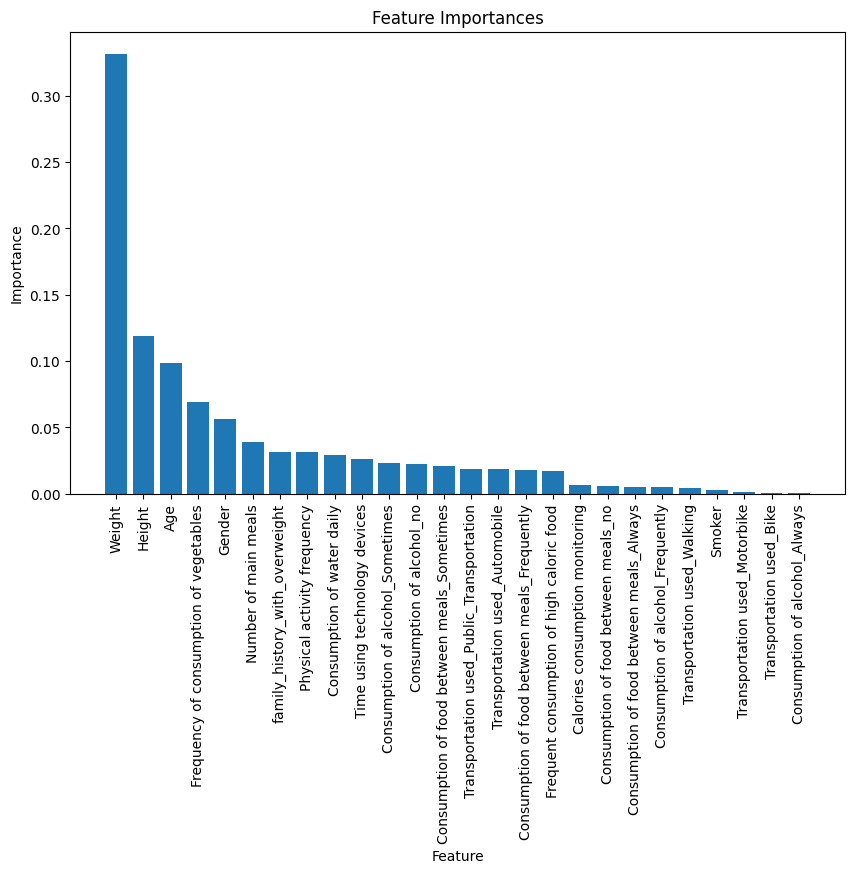

In [60]:
# Feature importances
feature_importances = clf.feature_importances_

# Get the column names
feature_names = X.columns

# Sort feature importances in descending order
indices = feature_importances.argsort()[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.show()

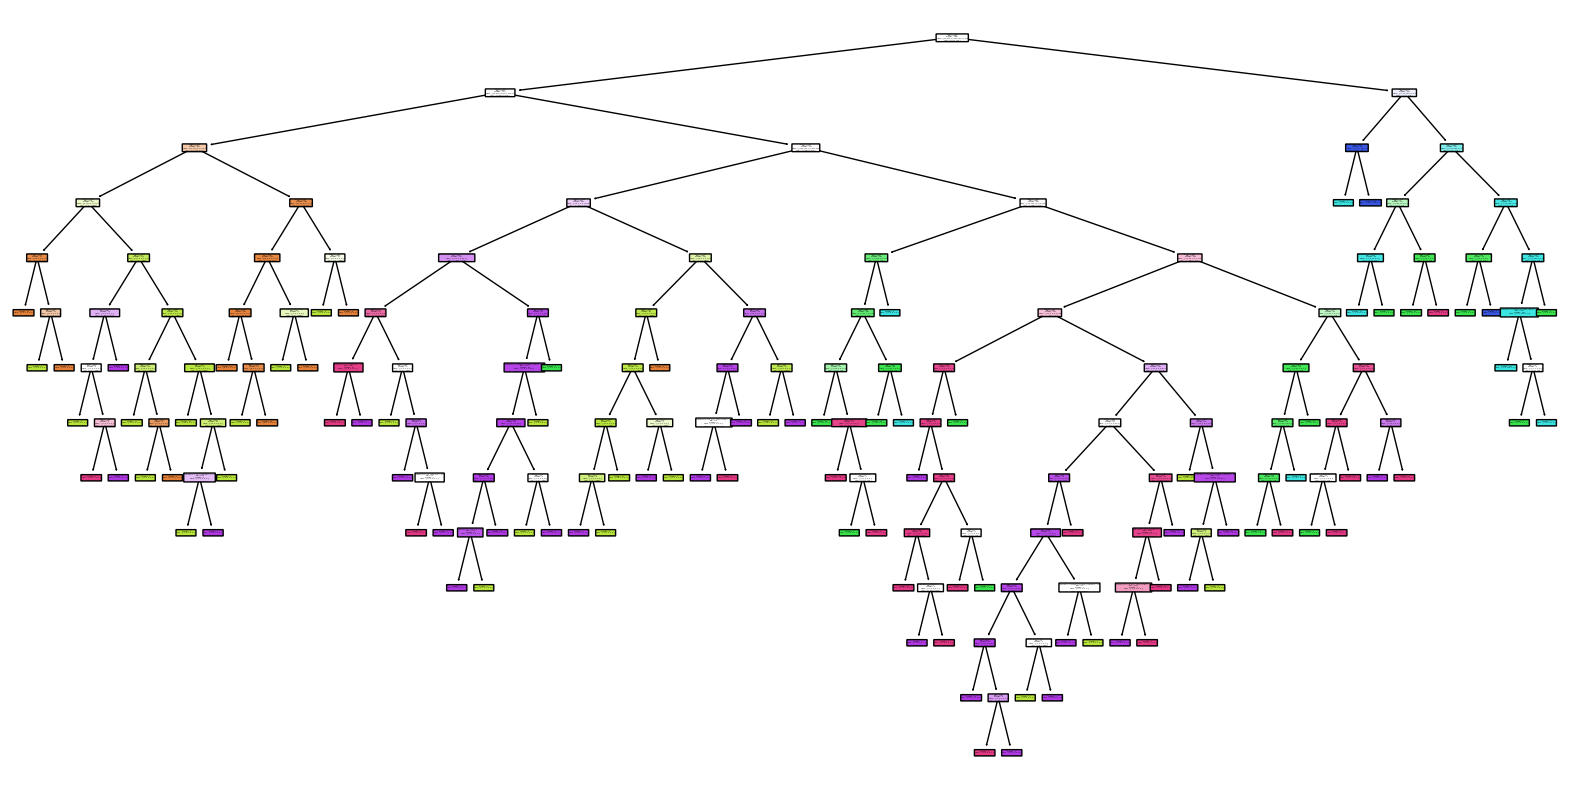

In [64]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=feature_names, class_names=clf.classes_, filled=True, rounded=True)
plt.show()

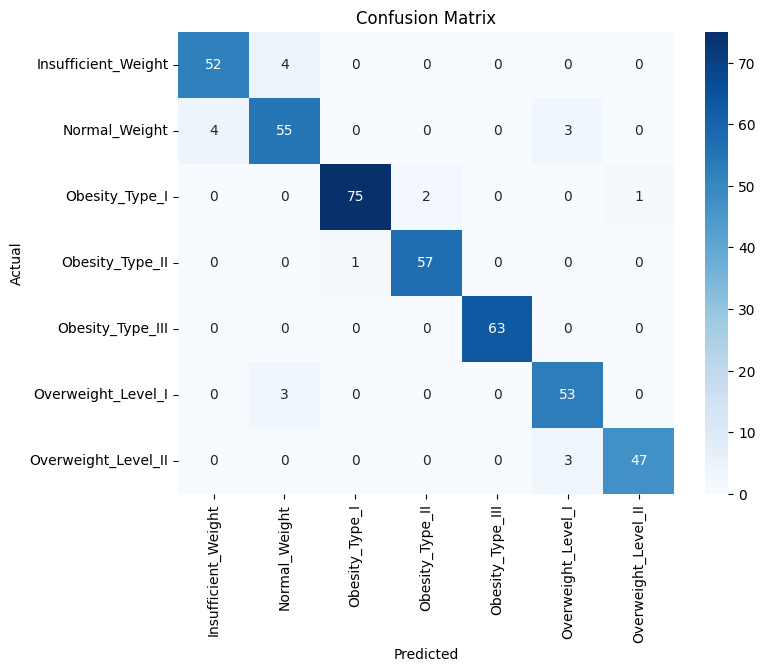

In [56]:
# Assuming you have trained a DecisionTreeClassifier named 'clf' and have X_test and y_test
y_pred = clf.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Accuracy: 0.9432624113475178


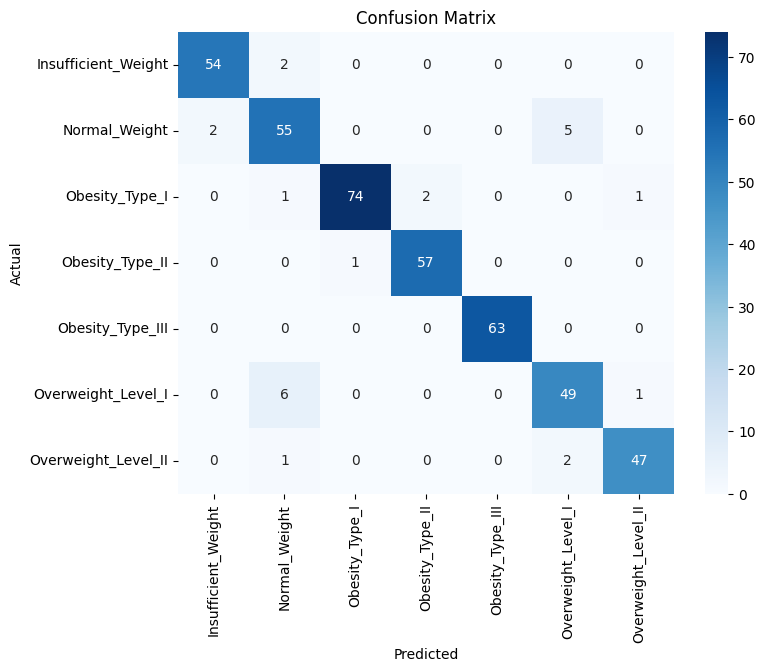

In [57]:
# Assuming you have a DataFrame 'df' with features and target variable

# Separate features (X) and target variable (y)
X = df_final.drop(columns=['Obesity level deducted'])
y = df_final['Obesity level deducted']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Create and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()